# Labor 5

In [47]:
import numpy as np # NumPy für numerische Berechnungen
import matplotlib.pyplot as plt # Matplotlib für Diagramme
from scipy import signal # SciPy für Signalverarbeitung
from scipy.signal import freqz # freqz zur Berechnung der Frequenzantwort
import warnings # Für die Behandlung von Warnungen

## a)  Bestimmung der Systemfunktion H(z) un der Filterfrequenzen f 

### 1. H(z)
#### Berechnung des Zählers
Die Nullstellen sind $ z_{1}=1, z_{2}=e^{\frac{i\pi}{3}} $ und $ z_{3}=e^{\frac{-i\pi}{3}} $


Umformen der Komplexen exponentzial Nullstellen in die Kartesiche Form

$ e^{\frac{\pm i\pi}{3}} = \frac{1}{2} \pm i\frac{\sqrt{3}}{2} $

Das Zählerpolynom $ N(z)= (z-1)(z-(\frac{1}{2} + i\frac{\sqrt{3}}{2}))(z-(\frac{1}{2} - i\frac{\sqrt{3}}{2}))$

Ausmultiplizieren:

$ = (z-1)(z^{2} -z +1)$

$ = z^{3} -2z^{2}+2z -1$

#### Berechnung des Nenners

Pollstellen sind {0,0,0}.

Aufgrund der dreifachen Pollstelle z=0 ist der Nenner $z^{3}$
#### Ergebnis
$ H(z)= \displaystyle\frac{z^{3} -2z^{2}+2z -1}{z^{3}}$


### 2. Frequenz

$ z= e^{i2\pi \frac{f}{f_{a}}} $

Für die Nullstellen gillt $ z= e^{\frac{\pm i\pi}{3}}$

Für z gillt allgemein $ e^{i2\pi \frac{f}{f_{a}}} $, da die z-Transformation auf dem Einheitskreis in die Fouriertransformierte X(f) übergeht.

Nullstellen und allgemeine Form gleichsetzen:

$ e^{\frac{\pm i\pi}{3}} = e^{i2\pi \frac{f}{f_{a}}} $ // ln()

$ \frac{\pm i\pi}{3} = i2\pi \frac{f}{f_{a}} $ // $ \frac{1}{\pi i}$

$  \pm \frac{1}{3} = 2 \frac{f}{f_{a}} $ // $\frac{f_{a}}{2}$

$f= \pm \frac{f_{a}}{6}$




## b) |H(z)| über der Komplexe Ebene und Zero-Pole-Plot für H(z)

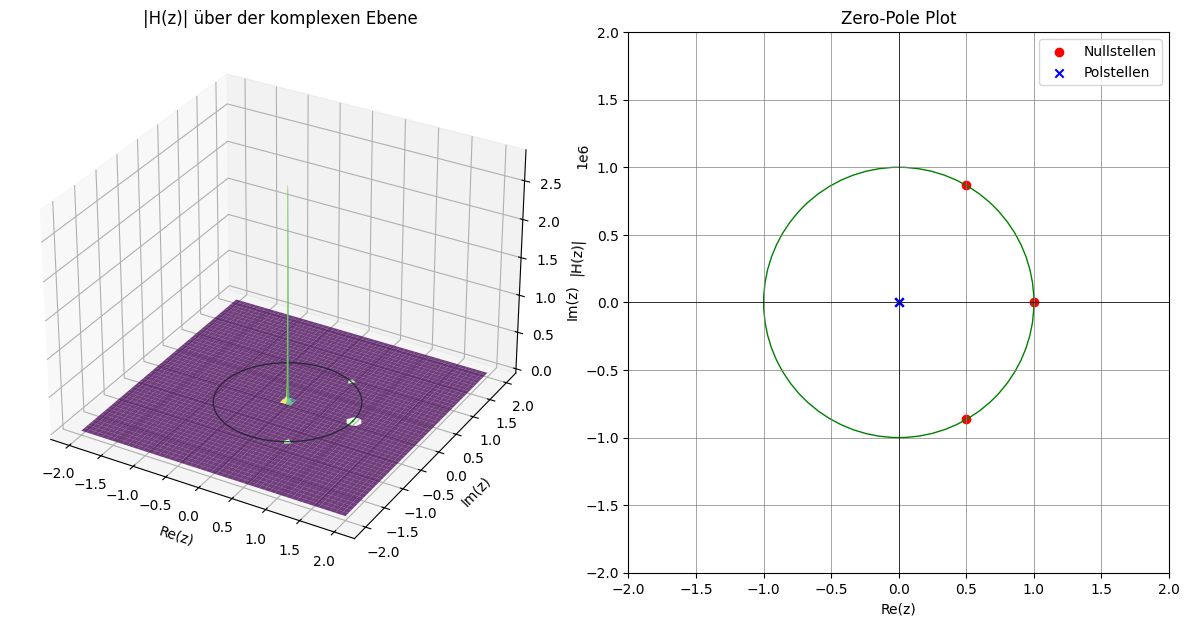

In [54]:
# Definiere die Übertragungsfunktion H(z)
numerator = [1, -2, 2, -1]
denominator = [1, 0, 0, 0]
H = signal.TransferFunction(numerator, denominator, dt=True)

# Erstelle ein Gitter für die komplexe Ebene
re = np.linspace(-2, 2, 400)
im = np.linspace(-2, 2, 400)
RE, IM = np.meshgrid(re, im)
Z = RE + 1j * IM

# Berechne den Betrag von H(z) über der komplexen Ebene
H_eval = np.polyval(numerator, Z) / np.polyval(denominator, Z)
H_magnitude = np.abs(H_eval)

# Erstelle eine Maske, um Werte unter 0.1 auf np.nan zu setzen
mask = H_magnitude < 0.1
H_magnitude[mask] = np.nan

# Zero-Pole Plot
zeros = np.roots(numerator)
poles = np.roots(denominator)

# Plot |H(z)| über der komplexen Ebene
fig = plt.figure(figsize=(12, 6))

# Magnitude plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(RE, IM, H_magnitude, cmap='viridis', alpha=0.75)

# Einheitskreis hinzufügen
theta = np.linspace(0, 2 * np.pi, 400)
x_circle = np.cos(theta)
y_circle = np.sin(theta)
ax1.plot(x_circle, y_circle, 0, linestyle='-', color='green', linewidth=1.0)

ax1.set_title('|H(z)| über der komplexen Ebene')
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_zlabel('|H(z)|')

# Zero-Pole Plot
ax2 = fig.add_subplot(122)
ax2.scatter(np.real(zeros), np.imag(zeros), marker='o', color='red', label='Nullstellen')
ax2.scatter(np.real(poles), np.imag(poles), marker='x', color='blue', label='Polstellen')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)

# Einheitskreis hinzufügen
einheitskreis = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='-', linewidth=1.0)
ax2.add_artist(einheitskreis)

ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_aspect('equal', 'box')
ax2.set_title('Zero-Pole Plot')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.legend()

plt.tight_layout()
plt.show()


## Vergleich
In der dreidimensionalen Darstellung wird |H(z)| auf die komplexe Ebene abgebildet. Hierdurch sieht man deutlich die Pol- und Nullstellen der Z-Transformation und wie diese die sich auf dem Einheitskreis abspielende Fouriertransformation beeinflussen. Das Zero Pole Diagramm zeigt ausschließlich die komplexe Ebene der dreidimensionalen Darstellung mit eingezeichneten Pol- und Nullstellen. Hier sieht man also lediglich deren Position und keine möglichen Einflüsse von |H(z)|.

## c) Einfluss der Pol- und Nullstellen
Auf dem Einheitskreis befinden sich drei Nullstellen. Zwei davon mit Imaginäranteil und eine bei 1. Die Nullstelle bei 1 sorgt für eine Unterdrückung des Gleichanteils in der Fouriertransformation. Die anderen beiden Nullstellen unterdrücken die Frequenz 1333. Die Polstelle von H(z) befindet sich exakt in der Mitte des Einheitskreises und hat somit keinen Einfluss auf den Frequenzgang.

## d) Zeitliche Impulsantwortfunktion

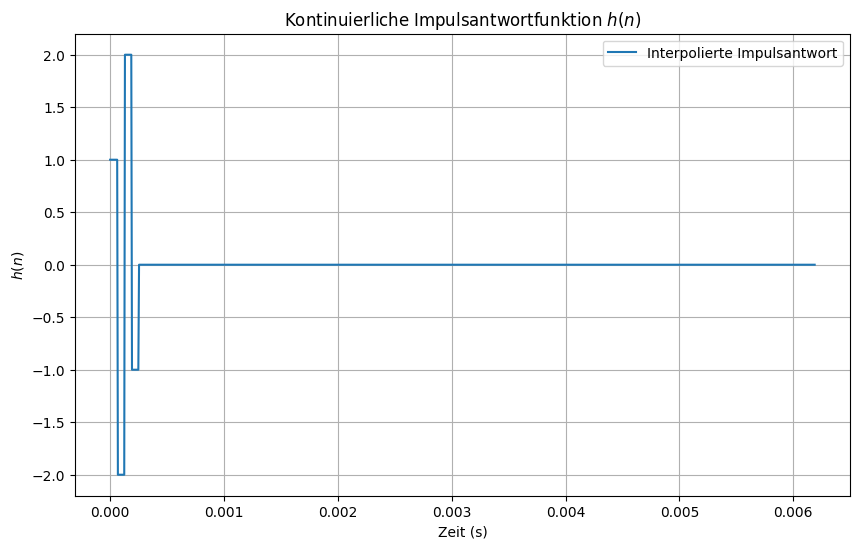

In [49]:
# Abtastrate
fa = 16000  
Ts = 1 / fa  # Abtastintervall

# Koeffizienten von H(z)
numerator = [1, -2, 2, -1]  # Zählerkoeffizienten
denominator = [1, 0, 0, 0]  # Nennerkoeffizienten

# Berechnen der Impulsantwort
h = np.zeros(100)
h[:len(numerator)] = numerator

# Erstellen des Zeitvektors
n = np.arange(100)
t = n * Ts

# Interpolieren der Impulsantwort für kontinuierliches Plot
from scipy.interpolate import interp1d

t_fine = np.linspace(0, t[-1], 1000)
interpolator = interp1d(t, h, kind='zero')
h_continuous = interpolator(t_fine)

# Plotten der kontinuierlichen Impulsantwort
plt.figure(figsize=(10, 6))
plt.plot(t_fine, h_continuous, label='Interpolierte Impulsantwort')

plt.title('Kontinuierliche Impulsantwortfunktion $h(n)$')
plt.xlabel('Zeit (s)')
plt.ylabel('$h(n)$')
plt.legend()
plt.grid(True)
plt.show()


### e) Systemantwort y(n) in Form einer Differenzengleichung
- Zerlegen von H(z) in Zähler und Nenner
$ H(z)= \displaystyle\frac{z^{3} -2z^{2}+2z -1}{z^{3} }= 1-2z^{-1}+2z^{-2}-z^{-3}$
- Aus H(z) lassen sich die Filterkoeffizienten h(n) interpretieren:

$ h(0)=1, h(1)=-2, h(2)=2, h(3)=-1 $

- Die FIR-Filter-Differenzengleichung lautet:

$ y(n) = \sum_{m = 0}^{M} h(m)\cdot x(n-m) $

- Nun Setzen wir die gefundenen h(n)-Werte ein:
$ y(n)= 1 \cdot x(n) -2 \cdot x(n-1)+2 \cdot x(n-2) -1\cdot y(n-3) $


## f) Systemantworten f=(1000, 2000, 2666)

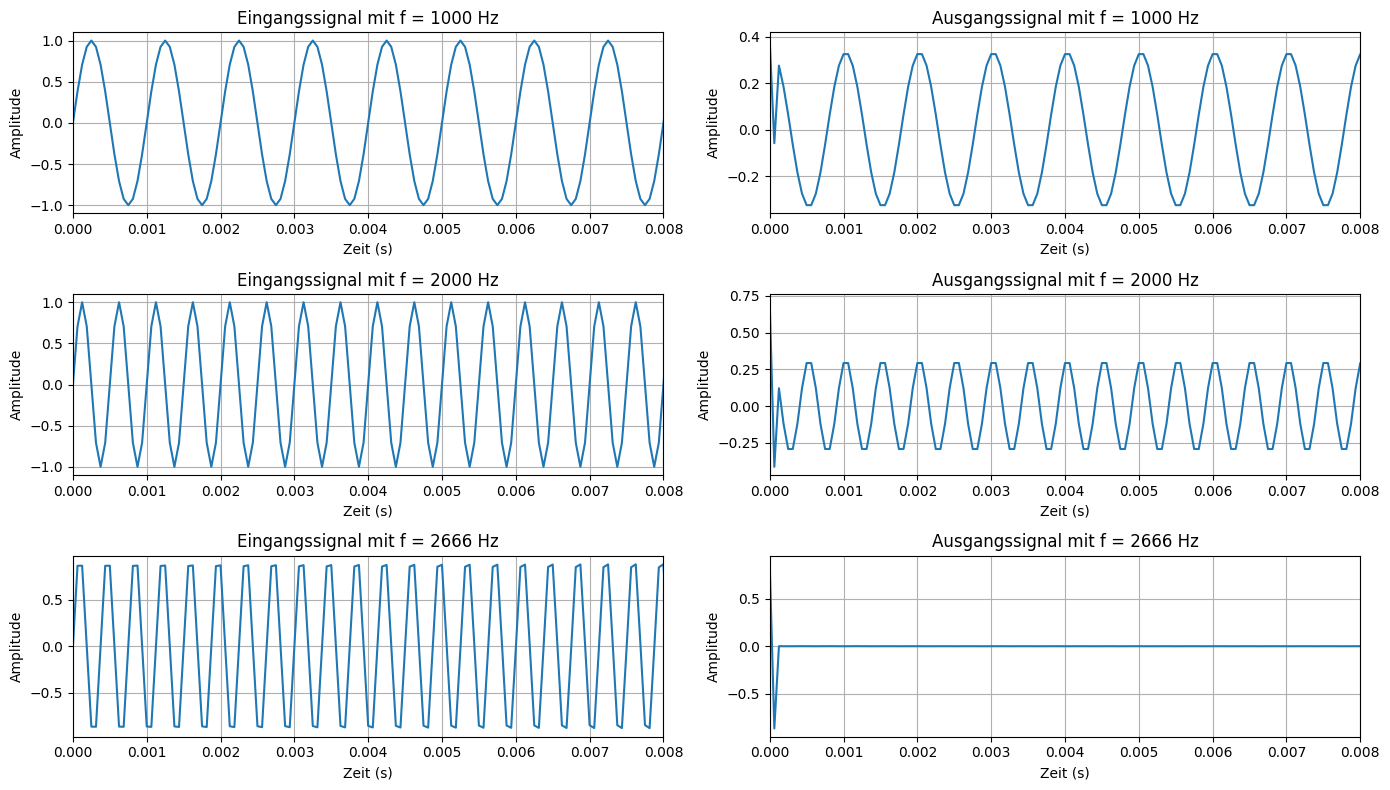

In [50]:
# Definieren der FIR-Filterkoeffizienten aus der gegebenen Systemfunktion H(z)
# H(z) = (z^3 - 2z^2 + 2z - 1) / z^3
b = [1, -2, 2, -1]  # Zählerkoeffizienten
a = [1, 0, 0, 0]    # Nennerkoeffizienten (

# Abtastfrequenz
fa = 16000  # Hz

# Definieren der zu testenden Frequenzen
frequencies = [1000, 2000, 2666]  # Hz

# Generieren der Eingangssignale
n = np.arange(0, 0.01, 1/fa)  # 0,01 Sekunde Daten
inputs = [np.sin(2 * np.pi * f * n) for f in frequencies]

# Berechnen der Frequenzantwort des Filters
w, h = freqz(b, a, worN=8000, fs=fa)

# Anwenden des Filters auf jedes Eingangssignal
outputs = [np.convolve(input_signal, b, mode='same') for input_signal in inputs]

# Plotten der Frequenzantwort des Filters
plt.figure(figsize=(14, 8))

for i, f in enumerate(frequencies):
    plt.subplot(len(frequencies), 2, 2*i+1)
    plt.plot(n, inputs[i])
    plt.title(f'Eingangssignal mit f = {f} Hz')
    plt.xlabel('Zeit (s)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 0.008) 
    plt.grid()
    
    plt.subplot(len(frequencies), 2, 2*i+2)
    plt.plot(n, outputs[i])
    plt.title(f'Ausgangssignal mit f = {f} Hz')
    plt.xlabel('Zeit (s)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 0.008) 
    plt.grid()

plt.tight_layout()
plt.show()


## Welcher Ton wird komplett gefiltert 
Der Eingehende Ton mit $ f_{0}$=2666Hz  wird komplettgefiltert, da die Frequenz 1/6 von der Abtastfrequenz $f_{a}= 16kHZ$ entspricht.

## g) Frequenzgang & Phasengang

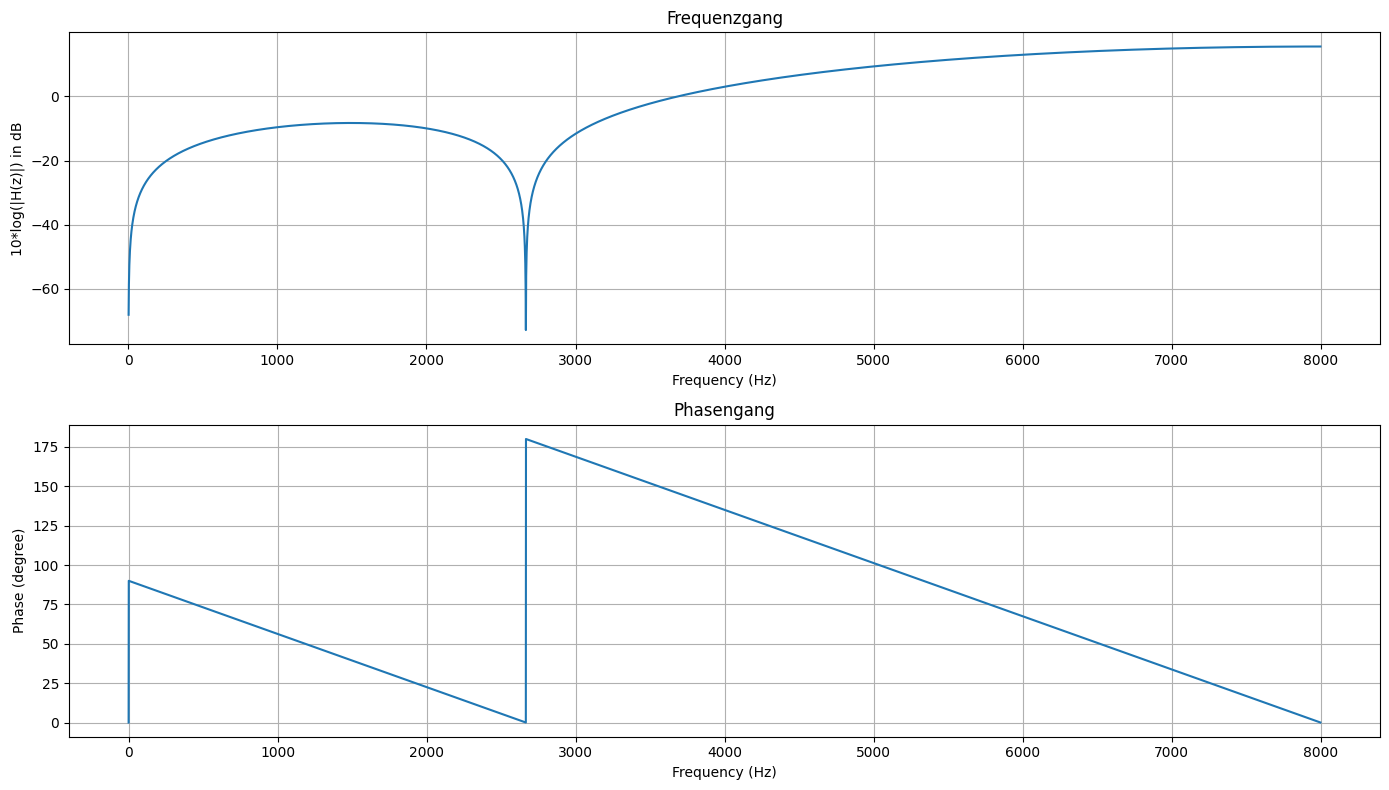

In [51]:
# Plot the frequency response of the filter
plt.figure(figsize=(14, 8))

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log10")
    plt.subplot(2, 1, 1)
    try:
        plt.plot(w, 20 * np.log10(abs(h)))
    except RuntimeWarning:
        pass
    plt.title('Frequenzgang')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('10*log(|H(z)|) in dB')
    plt.grid()

plt.subplot(2, 1, 2)
plt.plot(w, np.angle(h) * 180 / np.pi)
plt.title('Phasengang')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degree)')
plt.grid()

plt.tight_layout()
plt.show()


### Vergleich mit f)
- Das Bode-Diagramm ermöglicht es, das Ausgangssignal vorherzusagen. Bei den Frequenzen f1=1000Hz und f2=2000Hz zeigt der Frequenzgang eine Verringerung der Amplitude, und der Phasengang zeigt eine zeitliche Verschiebung des Signals um etwa 55° bei f1 und etwa 25° bei f2.
- Bei f3=2666Hz ist im Phasengang ein Sprung um 180° zu erkennen, und im Frequenzgang gibt es einen Tiefpunkt, was auf eine Nullstelle hinweist. Daher wird dieses Signal vollständig unterdrückt.

## h) z-Transformation

### Gegeben:

- Eingangssignal:
  $
  x(n) = \delta(n - 1) - \delta(n - 2) + \delta(n - 3) - \delta(n - 4)
  $

- Impulsantwortfunktion:
  $
  h(n) = \delta(n) + 2\delta(n - 1) + 3\delta(n - 2) + 4\delta(n - 3)
  $

### Schritt 1: z-Transformierte des Eingangssignals  X(z)

Die z-Transformierte eines Signals  x(n)  ist definiert als:
$
X(z) = \sum_{n=-\infty}^{\infty} x(n) z^{-n}
$

Für $ x(n) = \delta(n - 1) - \delta(n - 2) + \delta(n - 3) - \delta(n - 4) $):

$
X(z) = \delta(n - 1) z^{-1} - \delta(n - 2) z^{-2} + \delta(n - 3) z^{-3} - \delta(n - 4) z^{-4}
$

Da die Delta-Funktion $ \delta(n-k) $ zu $ z^{-k} $ wird, ergibt sich:
$
X(z) = z^{-1} - z^{-2} + z^{-3} - z^{-4}
$

### Schritt 2: z-Transformierte der Impulsantwort H(z)

Die z-Transformierte einer Impulsantwort h(n) ist definiert als:
$
H(z) = \sum_{n=-\infty}^{\infty} h(n) z^{-n}
$

Für $ h(n) = \delta(n) + 2\delta(n - 1) + 3\delta(n - 2) + 4\delta(n - 3) $):

$
H(z) = \delta(n) z^{0} + 2\delta(n - 1) z^{-1} + 3\delta(n - 2) z^{-2} + 4\delta(n - 3) z^{-3}
$

Dies ergibt:
$
H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}
$

### Schritt 3: Systemantwort Y(z)

Die Systemantwort Y(z) für ein FIR-Filter ergibt sich aus dem Produkt der z-Transformierten des Eingangssignals \( X(z) und der Impulsantwort H(z):
$
Y(z) = H(z) \cdot X(z)
$

Einsetzen der Ergebnisse:
$
X(z) = z^{-1} - z^{-2} + z^{-3} - z^{-4}
$
$
H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3}
$

Jetzt berechnen wir das Produkt:
$
Y(z) = (1 + 2z^{-1} + 3z^{-2} + 4z^{-3})(z^{-1} - z^{-2} + z^{-3} - z^{-4})
$

Multiplizieren und zusammenfassen der Terme:
$
Y(z) = z^{-1} - z^{-2} + z^{-3} - z^{-4} + 2z^{-2} - 2z^{-3} + 2z^{-4} - 2z^{-5} + 3z^{-3} - 3z^{-4} + 3z^{-5} - 3z^{-6} + 4z^{-4} - 4z^{-5} + 4z^{-6} - 4z^{-7}
$

Zusammengefasst:
$
Y(z) = z^{-1} + (-1 + 2)z^{-2} + (1 - 2 + 3)z^{-3} + (-1 + 2 - 3 + 4)z^{-4} - 2z^{-5} + (-3 + 3)z^{-6} - 4z^{-7}
$

$
Y(z) = z^{-1} + z^{-2} + 2z^{-3} + 2z^{-4} - 2z^{-5} - 4z^{-7}
$

Das ist die z-Transformierte der Systemantwort  Y(z).

## Ergebnis:

- $ X(z) = z^{-1} - z^{-2} + z^{-3} - z^{-4} $
- $ H(z) = 1 + 2z^{-1} + 3z^{-2} + 4z^{-3} $
- $ Y(z) = z^{-1} + z^{-2} + 2z^{-3} + 2z^{-4} - 2z^{-5} - 4z^{-7} $


## i) Bestimmen der Systemantwort und Plotten der Signale

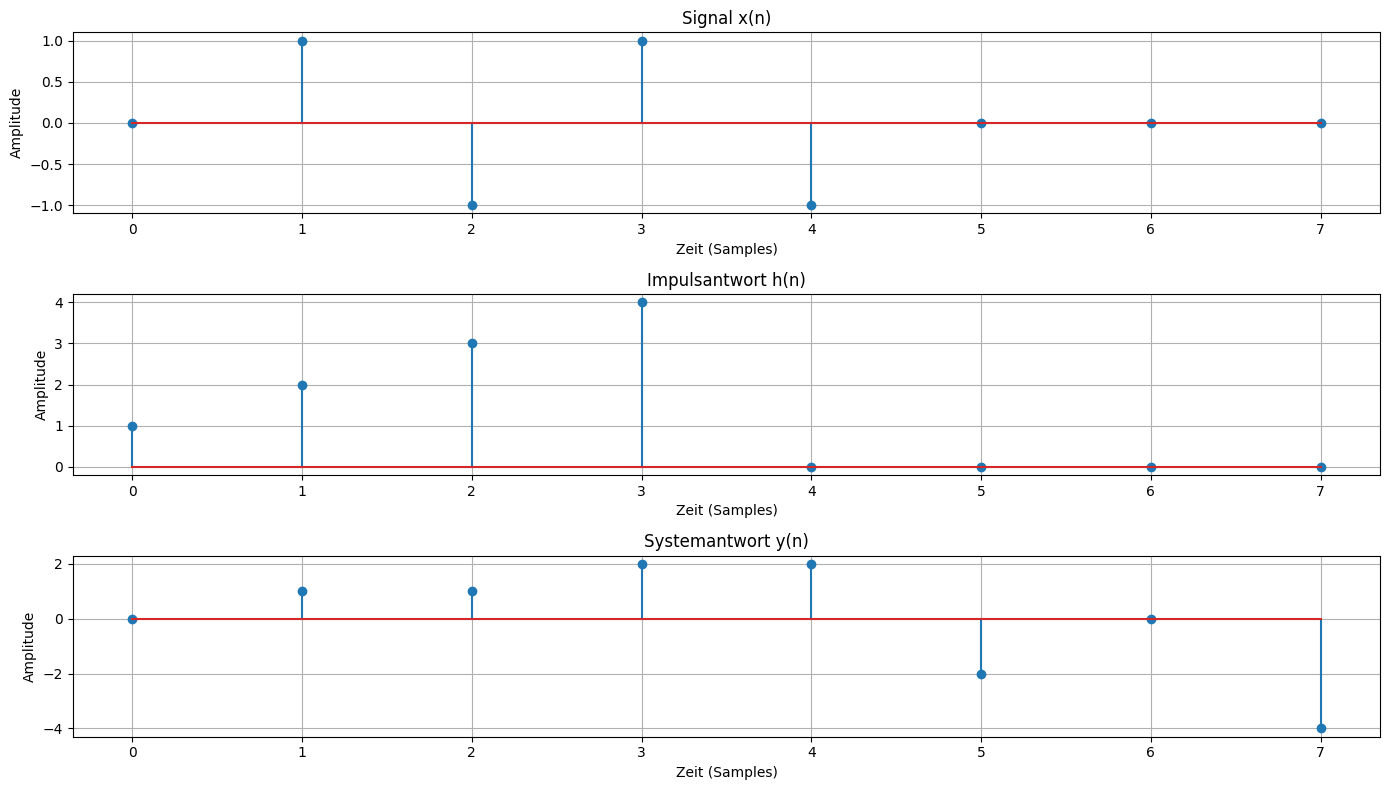

In [52]:
# Definiere die Abtastfrequenz
fa = 16000  # Hz
 
# Definiere den Zeitvektor zum Plotten
t = np.arange(0, 8) / fa  # Betrachten bis n = 7
 
# Definiere die Signale x(n), h(n) und y(n)
x_n = np.array([0, 1, -1, 1, -1, 0, 0, 0])
h_n = np.array([1, 2, 3, 4, 0, 0, 0, 0])
y_n = np.array([0, 1, 1, 2, 2, -2, 0, -4])
 
# Plotten
plt.figure(figsize=(14, 8))
 
# Plot von x(n)
plt.subplot(3, 1, 1)
plt.stem(t * fa, x_n)
plt.title('Signal x(n)')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Amplitude')
plt.grid(True)
 
# Plot von h(n)
plt.subplot(3, 1, 2)
plt.stem(t * fa, h_n)
plt.title('Impulsantwort h(n)')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Amplitude')
plt.grid(True)
 
# Plot von y(n)
plt.subplot(3, 1, 3)
plt.stem(t * fa, y_n)
plt.title('Systemantwort y(n)')
plt.xlabel('Zeit (Samples)')
plt.ylabel('Amplitude')
plt.grid(True)
 
plt.tight_layout()
plt.show()

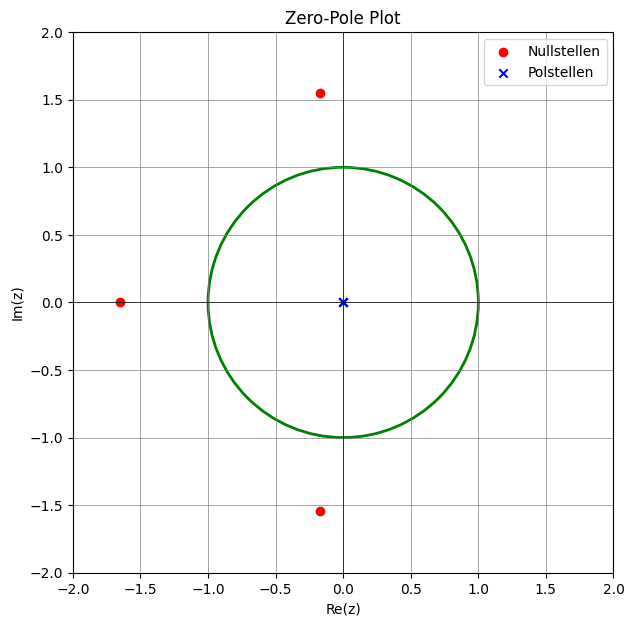

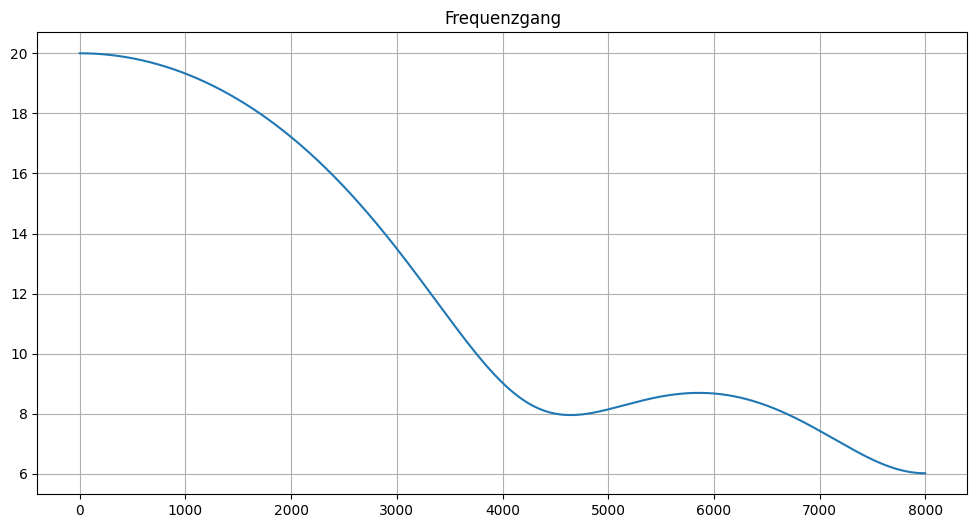

In [53]:
#H(z)

numerator = np.array([1, 2, 3, 4])

denominator = np.array([1, 0, 0, 0])

# Zero-Pole Plot
zeros = np.roots(numerator)
poles = np.roots(denominator)

fig = plt.figure(figsize=(12, 6))

ax2 = fig.add_subplot(122)
ax2.scatter(np.real(zeros), np.imag(zeros), marker='o', color='red', label='Nullstellen')
ax2.scatter(np.real(poles), np.imag(poles), marker='x', color='blue', label='Polstellen')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.grid(color='gray', linestyle='-', linewidth=0.5)

# Einheitskreis hinzufügen
einheitskreis = plt.Circle((0, 0), 1, color='green', fill=False, linestyle='-', linewidth=2.0)
ax2.add_artist(einheitskreis)

ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.set_aspect('equal', 'box')
ax2.set_title('Zero-Pole Plot')
ax2.set_xlabel('Re(z)')
ax2.set_ylabel('Im(z)')
ax2.legend()

plt.tight_layout()
plt.show()

# Berechnen der Frequenzantwort des Filters
w, h = freqz(numerator, denominator, worN=8000, fs=fa)

plt.figure(figsize=(12, 6))
plt.plot(w, 20 * np.log10(abs(h)))
plt.title('Frequenzgang')
plt.grid()